# Import packages

In [2]:
# LINC API
import hackathon_linc as lh
lh.init('92438482-5598-4e17-8b34-abe17aa8f598')

# For data handling
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta



    Welcome to the LINC Hackathon! Your token is now saved in the Console. 
    That means you don't need to carry that out when using the other functions
    as long as you don't close your console. 
    
    This function is only to be used once to authenticate your token.
    
    Happy coding!

    


# Load and format data


In [ ]:
# Read historical data
#df = pd.read_csv('historical_data/stockPrices_hourly.csv')
df = pd.read_csv('full_historical_data.csv')
# Convert date column to datetime objects
df['gmtTime'] = pd.to_datetime(df['gmtTime'])

# Add price column
df['price'] = (df['askMedian'] + df['bidMedian']) / 2

# Sort values
df = df.sort_values(by=['symbol', 'gmtTime'])

###### Create DataFrame with daily values ######

# Aggregate daily open and close prices
df_daily = df.groupby(['symbol', df['gmtTime'].dt.date]).agg(
    open_price=('price', 'first'),  # First price of the day (07:00)
    close_price=('price', 'last'),  # Last price of the day (15:00)
    askVolume=('askVolume', 'sum'), # Sum ask volume over the entire day
    bidVolume=('bidVolume', 'sum') # Sum bid volume over the entire day
).reset_index()

# Rename the date column
df_daily.rename(columns={'gmtTime': 'date'}, inplace=True)

# Sort values
df_daily = df_daily.sort_values(by=['symbol', 'date'])

df.head()

gmtTime  askMedian  bidMedian   askVolume   bidVolume  \
18 2015-04-22 08:00:00  75.060467  75.027900  658.950000  418.816667   
19 2015-04-22 09:00:00  74.813583  74.784950  390.616667  321.366667   
30 2015-04-22 10:00:00  74.508883  74.477000  498.749997  317.700000   
42 2015-04-22 11:00:00  74.515350  74.486233  250.116667  286.550000   
52 2015-04-22 12:00:00  74.435867  74.410100  357.583333  373.900000   

    spreadMedian  symbol      price  
18      0.032500  STOCK1  75.044183  
19      0.028667  STOCK1  74.799267  
30      0.031825  STOCK1  74.492942  
42      0.029075  STOCK1  74.500792  
52      0.025808  STOCK1  74.422983

# Print statistics
All dates are between 2015-04-22 08:00:00 and 2020-04-23 15:00:00, a total difference of 5 years, 0 months, 1 days, 8 hours (although the number of rows per stock differs somewhat).

In [3]:
# Print statistics
print(f"Number of stocks: {len(df['symbol'].unique())}")
print(f"Total data length: {len(df)}")
# Loop through each stock
for stock, df_stock in df.groupby('symbol'):
    print(f"-----{stock}-----")
    print(f"{len(df_stock)} hours of data.")

    # Get first and last date
    first_date = df_stock['gmtTime'].min()
    last_date = df_stock['gmtTime'].max()

    # Calculate difference using relativedelta
    delta = relativedelta(last_date, first_date)

    # Print results
    print(f"First Date: {first_date}")
    print(f"Last Date: {last_date}")
    print(f"Time Difference: {delta.years} years, {delta.months} months, {delta.days} days, {delta.hours} hours")

Number of stocks: 10
Total data length: 118290
-----STOCK1-----
11857 hours of data.
First Date: 2015-04-22 08:00:00
Last Date: 2020-04-23 15:00:00
Time Difference: 5 years, 0 months, 1 days, 7 hours
-----STOCK10-----
11863 hours of data.
First Date: 2015-04-22 07:00:00
Last Date: 2020-04-23 15:00:00
Time Difference: 5 years, 0 months, 1 days, 8 hours
-----STOCK2-----
11840 hours of data.
First Date: 2015-04-22 07:00:00
Last Date: 2020-04-23 15:00:00
Time Difference: 5 years, 0 months, 1 days, 8 hours
-----STOCK3-----
11876 hours of data.
First Date: 2015-04-22 07:00:00
Last Date: 2020-04-23 15:00:00
Time Difference: 5 years, 0 months, 1 days, 8 hours
-----STOCK4-----
11788 hours of data.
First Date: 2015-04-22 07:00:00
Last Date: 2020-04-23 15:00:00
Time Difference: 5 years, 0 months, 1 days, 8 hours
-----STOCK5-----
11861 hours of data.
First Date: 2015-04-22 07:00:00
Last Date: 2020-04-23 15:00:00
Time Difference: 5 years, 0 months, 1 days, 8 hours
-----STOCK6-----
11856 hours of da

# Plot data using matplotlib

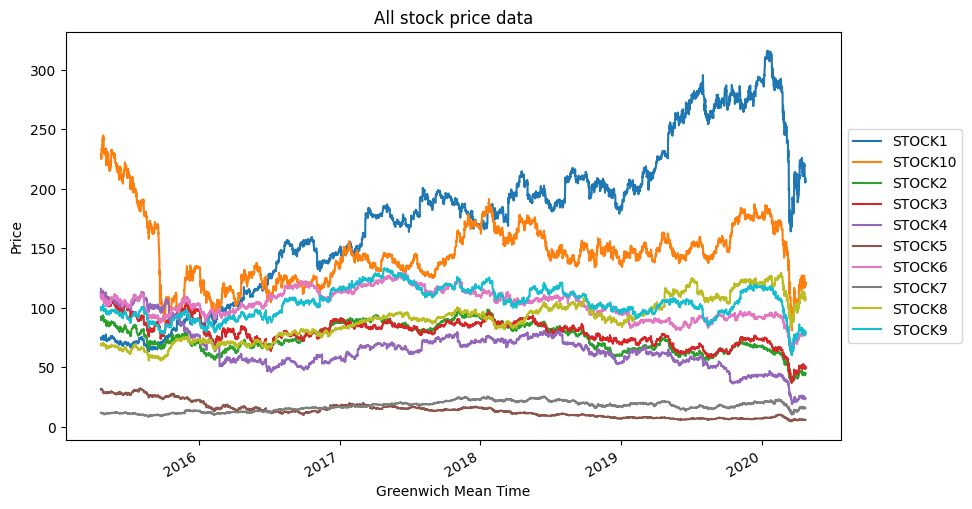

In [7]:
import matplotlib.pyplot as plt

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6)) # Width = 10 inches, Height = 6 inches

# Add each stock to the plot
for stock, df_stock in df.groupby('symbol'):
    ax.plot(df_stock['gmtTime'], df_stock['price'], label=stock)

# Add axis labels, legend and title
ax.set_xlabel('Greenwich Mean Time')
ax.set_ylabel('Price')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Moves legend outside
ax.set_title('All stock price data')

fig.autofmt_xdate()  # Format x-axis for better date visibility
plt.show()

# Plot data using hvplot (interactive)
Need to pip install holoviews and hvplot

In [6]:
import holoviews as hv
import hvplot.pandas
hvplot.extension('bokeh')

df.hvplot.line(
    x='gmtTime',
    y='price',
    by='symbol',
    height=600,
    width=1000,
    legend='right',
    xlabel='Greenwich Mean Time',
    ylabel='Price',
    title='All stock price data'
    )

:NdOverlay   [symbol]
   :Curve   [gmtTime]   (price)

# Calculate and plot daily returns

In [ ]:
import holoviews as hv
import hvplot.pandas
hvplot.extension('bokeh')

# Compute daily percentage change
df_daily['pct_change'] = (df_daily['close_price'] - df_daily['open_price']) / df_daily['open_price'] * 100

# Plot results
df_daily.hvplot.line(
    x='date',
    y='pct_change',
    by='symbol',
    height=600,
    width=1000,
    legend='right',
    xlabel='Greenwich Mean Time',
    ylabel='Daily returns',
    title='All daily returns data'
)   

:NdOverlay   [symbol]
   :Curve   [date]   (pct_change)